In [1]:
import matplotlib.pyplot as plt #Visulization
from matplotlib import rc # 한글 깨져서
import seaborn as sns #Visulization
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
import requests as rq
import pandas as pd
import numpy as np
import math
import json
import bs4
import re

import scipy as sp
import scipy.stats

from datetime import datetime

import tensorflow as tf

In [2]:
rc('font', family="Malgun Gothic")

In [3]:
mean_of_month = pd.read_csv("C:/Users/PC/Desktop/d/mean_of_month_1.csv")

In [4]:
# 월
import datetime as dt
from dateutil.relativedelta import relativedelta

yyyymm_1 = '200801'
yyyymm_2 = '201812'

MONTH = relativedelta(months=+1)

fmt = '%Y%m'
date_1 = dt.datetime.strptime(yyyymm_1, fmt).date()
date_2 = dt.datetime.strptime(yyyymm_2, fmt).date()

d = date_1
yyyymm = []
while d <= date_2:
#     print(d)
#     print(d.strftime('%Y')+d.strftime('%m'))
    yyyymm.append(d.strftime('%Y')+d.strftime('%m'))
    d += MONTH

In [5]:
mean_of_month['date'] = yyyymm
mean_of_month['yyyy'] = mean_of_month['date'].map(lambda x : x[0:4])
mean_of_month['mm'] = mean_of_month['date'].map(lambda x : x[4:6])

In [6]:
x_t = mean_of_month['kgPrice'][:-1]
x_t1 = mean_of_month['kgPrice'][1:]

In [7]:
y = np.log(x_t.values / x_t1.values)

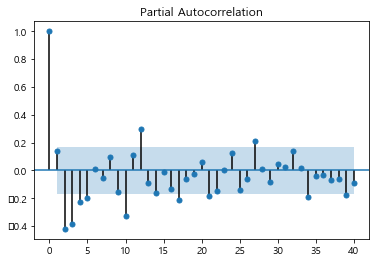

In [8]:
import statsmodels.api as sm
sm.graphics.tsa.plot_pacf(y, lags=40)
plt.show()

In [9]:
x_t = mean_of_month['kgPrice'][:-3]
x_t1 = mean_of_month['kgPrice'][1:-2]
x_t2 = mean_of_month['kgPrice'][2:-1]
x_t3 = mean_of_month['kgPrice'][3:]

In [10]:
x_train = np.c_[ x_t1.values[:-26], x_t2.values[:-26], x_t3.values[:-26] ]
y_train = x_t.values[:-26].reshape(-1,1)
x_test = np.c_[ x_t1.values[103:], x_t2.values[103:], x_t3.values[103:] ]
y_test = x_t.values[103:].reshape(-1,1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(103, 3)
(103, 1)
(26, 3)
(26, 1)


In [11]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

W1 = tf.Variable(tf.random_normal([x_train.shape[1], 100],stddev=0.01))
b1 = tf.Variable(tf.zeros([100]))
H1 = tf.nn.relu(tf.matmul(X, W1)+b1)

W2 = tf.Variable(tf.random_normal([100, 1],stddev=0.01))
b2 = tf.Variable(tf.zeros([1]))
model = tf.matmul(H1, W2) + b2

Instructions for updating:
Colocations handled automatically by placer.


In [12]:
cost = tf.reduce_mean(tf.square(model - Y))
optimizer = tf.train.AdamOptimizer(learning_rate=0.0001)
train_op = optimizer.minimize(cost)

Instructions for updating:
Use tf.cast instead.


In [13]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for step in range(100000):
        _, cost_val = sess.run([train_op, cost], feed_dict={X: x_train, Y: y_train})
        
        if step % 10000 == 0: print(step, cost_val, sess.run(W1), sess.run(b1))

    # 학습결과 확인
    print("Y:", sess.run(model, feed_dict={X:x_test }))
    
    predict = sess.run(model, feed_dict={X: x_test})
    # 정확도 출력
#     is_correct = tf.equal(prediction, target)
#     accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
#     print('정확도 %.2f' % sess.run(accuracy * 100, feed_dict={X:y_train, Y:y_test}))

0 601204.9 [[ 1.69031834e-03 -3.52125906e-04 -1.72302884e-03 -8.55327491e-03
   3.64070875e-03  7.52878236e-03  1.19344890e-03  7.50690093e-03
  -1.95765402e-03 -2.61006667e-03  1.00377342e-02 -8.05180240e-03
  -1.38422782e-02 -9.86962859e-03  4.96083521e-04  1.41279108e-03
  -2.93934322e-03 -1.11039272e-02 -4.62562777e-03  1.07414993e-02
   8.67637282e-04  1.31393373e-02 -4.75261034e-03  2.64508347e-03
  -5.08863013e-03  1.15349051e-02  7.35189999e-04 -1.30306026e-02
   1.01879621e-02  7.87864532e-03 -2.83913803e-03 -7.64657976e-03
   1.23971850e-02  4.77761496e-03 -1.98538136e-02 -4.10069246e-03
  -8.68843985e-04  1.84576947e-03  1.18723875e-02 -9.22159106e-03
   1.05008585e-02 -5.54561103e-03  6.41047675e-03 -1.38103985e-03
  -1.47400401e-03 -2.85059097e-03  1.21070156e-02 -1.17956502e-02
  -1.13723530e-02  5.91546576e-03 -3.02502862e-03 -5.00834640e-03
  -1.12147778e-02 -1.87688088e-03  1.45761557e-02  1.67963357e-04
   6.28025504e-03  7.29283504e-03 -4.80274815e-04  2.33542174e-02

20000 35979.195 [[ 1.69031834e-03 -3.52125906e-04  6.73234323e-03 -8.55327491e-03
   7.44410977e-03  1.29468227e-02  1.12246424e-02  1.49365030e-02
  -1.95765402e-03 -2.61006667e-03  2.11777054e-02 -5.57091553e-03
  -1.38422782e-02 -1.17855174e-02  4.43902100e-03  1.41279108e-03
  -6.91931322e-03 -8.45788978e-03  1.62636046e-03  2.36759931e-02
   8.67637282e-04  1.76391583e-02 -6.72834367e-03  1.00151275e-03
  -5.08863013e-03  1.76690295e-02 -3.61681962e-03 -1.30306026e-02
   8.97346064e-03  1.27647007e-02 -2.83913803e-03 -7.64657976e-03
   5.25716459e-03  3.37609183e-03 -1.21179158e-02 -4.99499775e-03
  -8.68843985e-04  5.01083955e-03  1.73601676e-02 -1.07389269e-02
   8.24409444e-03 -8.23611487e-03  1.81130189e-02  8.53098929e-03
  -1.47400401e-03 -2.85059097e-03  1.60346273e-02 -1.17956502e-02
  -1.34304054e-02  7.38560874e-03 -3.02502862e-03  6.88728224e-03
  -1.23017840e-02 -1.87688088e-03  1.57646742e-02  1.67963357e-04
   1.20876804e-02  3.48861259e-03 -4.80274815e-04  3.5675272

40000 29863.674 [[ 1.69031834e-03 -3.52125906e-04 -2.39424640e-03 -8.55327491e-03
  -1.87253987e-03  1.17909419e-03 -2.07051029e-03  5.28572081e-03
  -1.95765402e-03 -2.61006667e-03  1.77381206e-02 -5.12622530e-03
  -1.38422782e-02 -1.17855174e-02 -1.29035278e-03  1.41279108e-03
  -6.91931322e-03 -5.87162981e-03 -5.81882289e-03 -1.65221316e-03
   8.67637282e-04 -1.88313040e-03 -6.72834367e-03  1.00151275e-03
  -5.08863013e-03  5.31091355e-03 -3.61681962e-03 -1.30306026e-02
   8.97346064e-03 -3.00300680e-03 -2.83913803e-03 -7.64657976e-03
   5.25716459e-03  3.37609183e-03 -2.47297492e-02 -1.70601439e-03
  -8.68843985e-04  5.27938502e-03  1.75816957e-02 -1.07389269e-02
   8.24409444e-03 -8.23611487e-03  9.59886890e-03 -1.20817241e-03
  -1.47400401e-03 -2.85059097e-03  1.20113352e-02 -1.17956502e-02
  -1.34304054e-02 -1.16164982e-03 -3.02502862e-03 -5.89937111e-03
  -1.23017840e-02 -1.87688088e-03 -1.84504618e-03  1.67963357e-04
   1.18437310e-05  3.48861259e-03 -4.80274815e-04  7.5387880

60000 29687.152 [[ 1.69031834e-03 -3.52125906e-04 -1.98241812e-03 -8.55327491e-03
  -2.06560106e-03  9.08083806e-04 -2.06565741e-03  2.33833934e-03
  -1.95765402e-03 -2.61006667e-03  1.76784080e-02 -1.97975314e-03
  -1.38422782e-02 -1.17855174e-02 -2.17855838e-03  1.41279108e-03
  -6.91931322e-03 -2.06009275e-03 -2.15236330e-03 -2.13345722e-03
   8.67637282e-04 -1.96626619e-03 -6.72834367e-03  1.00151275e-03
  -5.08863013e-03  5.42555470e-03 -3.61681962e-03 -1.30306026e-02
   8.97346064e-03 -1.89891714e-03 -2.83913803e-03 -7.64657976e-03
   5.25716459e-03  3.37609183e-03 -1.77194290e-02 -2.04791455e-03
  -8.68843985e-04  2.31978507e-03  1.74846407e-02 -1.07389269e-02
   8.24409444e-03 -8.23611487e-03  1.76636074e-02 -2.05413532e-03
  -1.47400401e-03 -2.85059097e-03  6.41467236e-03 -1.17956502e-02
  -1.34304054e-02 -2.00402574e-03 -3.02502862e-03 -2.02486687e-03
  -1.23017840e-02 -1.87688088e-03 -2.08812719e-03  1.67963357e-04
  -2.00910564e-03  3.48861259e-03 -4.80274815e-04  1.7247095

80000 29561.797 [[ 1.69031834e-03 -3.52125906e-04 -1.55223813e-03 -8.55327491e-03
  -1.55669742e-03  8.99180595e-04 -1.69792143e-03  2.58866581e-03
  -1.95765402e-03 -2.61006667e-03  1.67566147e-02 -1.68976805e-03
  -1.38422782e-02 -1.17855174e-02 -1.65056996e-03  1.41279108e-03
  -6.91931322e-03 -1.46388612e-03 -1.67381275e-03 -1.74263876e-03
   8.67637282e-04 -1.58969779e-03 -6.72834367e-03  1.00151275e-03
  -5.08863013e-03  2.60109827e-03 -3.61681962e-03 -1.30306026e-02
   8.97346064e-03 -1.63269567e-03 -2.83913803e-03 -7.64657976e-03
   5.25716459e-03  3.37609183e-03 -3.52749950e-03 -1.60964241e-03
  -8.68843985e-04  2.55279569e-03  1.66658815e-02 -1.07389269e-02
   8.24409444e-03 -8.23611487e-03  1.67680029e-02 -1.57692877e-03
  -1.47400401e-03 -2.85059097e-03  5.47724031e-03 -1.17956502e-02
  -1.34304054e-02 -1.70999242e-03 -3.02502862e-03 -1.64500193e-03
  -1.23017840e-02 -1.87688088e-03 -1.48507173e-03  1.67963357e-04
  -1.55480218e-03  3.48861259e-03 -4.80274815e-04  1.6494324

Y: [[1407.1115 ]
 [ 938.1266 ]
 [ 719.15295]
 [ 712.99884]
 [ 807.28906]
 [ 792.57874]
 [ 931.7555 ]
 [ 818.24097]
 [ 605.64465]
 [ 703.51666]
 [ 763.9771 ]
 [1088.1602 ]
 [1141.0933 ]
 [ 766.6422 ]
 [ 573.12024]
 [ 686.7294 ]
 [ 673.961  ]
 [ 940.58215]
 [ 742.42914]
 [1019.77985]
 [ 746.88513]
 [ 674.17975]
 [ 756.05536]
 [1076.0164 ]
 [1141.8163 ]
 [ 729.40515]]


In [14]:
compare_value = np.c_[y_test, predict]

In [15]:
# numppy array에 컬럼이름 주기
compare_value = {'실제값':compare_value[:,0], '예측값':compare_value[:,1]}

In [16]:
# Dataframe으로 만들기
compare_value = pd.DataFrame(compare_value)

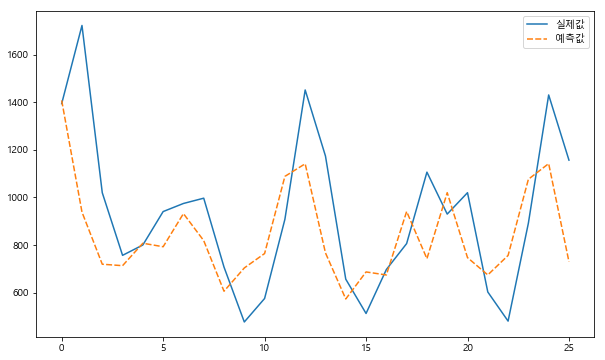

In [17]:
plt.figure(num=None, figsize=(10, 6))
sns.lineplot(data=compare_value)

## 한달 땡겨봄

In [18]:
compare_value2 = pd.DataFrame(compare_value.iloc[1:,0].reset_index(drop=True))

In [19]:
compare_value2 = pd.concat((compare_value2,compare_value.iloc[:,1]), axis=1)

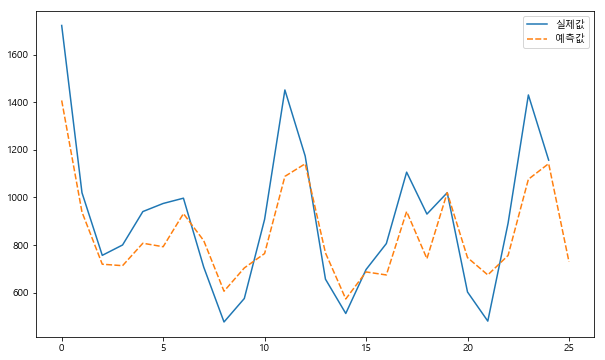

In [20]:
plt.figure(num=None, figsize=(10, 6))
sns.lineplot(data=compare_value2)